In [31]:
import xarray as xr
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from utility import analysis_parameters as ap

lat0,lat1 = -5,5
lon0,lon1 = 143,153
h = "h7"

In [32]:
feb = [ "02-%02d"%(i+1) for i in range(28) ]
dates = ["01-30", "01-31"]+ feb
ds = xr.open_dataset(ap.test_data_file_name(h, dates[0])).drop(["P3_input_dim","P3_output_dim","ilev","lev","swband","lwband", "slat","slon"])
ds = ds.sel(lat=slice(lat0, lat1)).sel(lon=slice(lon0,lon1))

for date in dates[1:]:
    file = ap.test_data_file_name(h, date)
    print(file)
    ds_1 = xr.open_dataset(file).drop(["P3_input_dim","P3_output_dim","swband","lwband", "slat","slon"])
    ds_1 = ds_1.sel(lat=slice(lat0, lat1)).sel(lon=slice(lon0,lon1))
    ds = xr.combine_by_coords([ds, ds_1], combine_attrs="drop")
    # print(ds)




/home/disk/eos12/hillmanb/scream/dyamond2/256x512/SCREAMv0.SCREAM-DY2.ne1024pg2.20201127.eam.h7.2020-01-31-00000.nc
/home/disk/eos12/hillmanb/scream/dyamond2/256x512/SCREAMv0.SCREAM-DY2.ne1024pg2.20201127.eam.h7.2020-02-01-00000.nc
/home/disk/eos12/hillmanb/scream/dyamond2/256x512/SCREAMv0.SCREAM-DY2.ne1024pg2.20201127.eam.h7.2020-02-02-00000.nc
/home/disk/eos12/hillmanb/scream/dyamond2/256x512/SCREAMv0.SCREAM-DY2.ne1024pg2.20201127.eam.h7.2020-02-03-00000.nc
/home/disk/eos12/hillmanb/scream/dyamond2/256x512/SCREAMv0.SCREAM-DY2.ne1024pg2.20201127.eam.h7.2020-02-04-00000.nc
/home/disk/eos12/hillmanb/scream/dyamond2/256x512/SCREAMv0.SCREAM-DY2.ne1024pg2.20201127.eam.h7.2020-02-05-00000.nc
/home/disk/eos12/hillmanb/scream/dyamond2/256x512/SCREAMv0.SCREAM-DY2.ne1024pg2.20201127.eam.h7.2020-02-06-00000.nc
/home/disk/eos12/hillmanb/scream/dyamond2/256x512/SCREAMv0.SCREAM-DY2.ne1024pg2.20201127.eam.h7.2020-02-07-00000.nc
/home/disk/eos12/hillmanb/scream/dyamond2/256x512/SCREAMv0.SCREAM-DY2.ne

## 2D variables

In [ ]:
#plotting
fig, ax = plt.subplots(1,1,figsize=(6,4))
log=False
t=0

## h0
# bins=np.linspace(0.01,1,20)
# vars = ["CLDTOT","CLDHGH","CLDMED","CLDLOW"]
# bins = np.linspace(-5,1,25)
# vars = ["TMCLDICE", "TMCLDLIQ", "TMCLDRIM", "TMRAINQM"]
# vmin, vmax = -5, 1
# vars = ["CAPE", "CIN"]
# bins=30

## h1
# vars = ["LHFLX", "SHFLX"]
# vars = ["PRECSL", "PRECT"]
# vars = ["QREFHT"]
# vars = ["TREFHT"]
# vars = ["TAUX", "TAUY"]
# vars =  ["WINDSPD_10M"]
# vars = ["PS"]
bins=30

## h2
# vars = ["FLDS", "FLNS", "FSDS", "FSNS"]
# vars = ["FLNT", "FLNTC"]
# vars = ["FSNTOA", "FSNTOAC"]

## h3
# vars = ["OMEGA200", "OMEGA500", "OMEGA700", "OMEGA850"]
# vars = ["RH200", "RH500", "RH700", "RH850"]
# vars = ["Z200", "Z500", "Z700", "Z850"]

## h4 
vars = ["TMNUMICE", "TMNUMLIQ", "TMNUMRAI"]
# bins = np.linspace(-3,12)


#histogram
for v in vars:
    if log:
        np.log10(ds[v]).plot.hist(bins=bins, ax=ax, density=False, histtype="step", label=v)
    else:
        ds[v].plot.hist(bins=bins, ax=ax, density=False, histtype="step", label=v)
plt.legend()
if log:
    plt.title("Histogram - 30 days (log scale)")
else:
    plt.title("Histogram - 30 days")
plt.show()

# plot snapshot on latlon
# fig, ax = plt.subplots(1, len(vars), figsize=(3*len(vars),3), sharey=True, sharex=True)
# for i,axi in enumerate(ax):
#     if log:
#         np.log10(ds[vars[i]][t]).plot.contourf(ax=ax[i], vmin=vmin, vmax=vmax)
#     else:
#         ds[vars[i]][t].plot.contourf(ax=ax[i])
#     axi.set_ylabel("Lat")
#     axi.set_xlabel("Lon")
#     axi.set_title(vars[i])
# fig.suptitle(ds.time[t].values)
# plt.tight_layout()
# plt.show()

In [ ]:
# vars = ["LHFLX", "SHFLX", "PRECSL", "PRECT", "QREFHT", "TREFHT", "TAUX", "TAUY", "WINDSPD_10M", "PS"]
# vars = ["FLDS", "FLNS", "FSDS", "FSNS", "FLNT", "FLNTC", "FSNTOA", "FSNTOAC"]
# vars = ["OMEGA200", "OMEGA500", "OMEGA700", "OMEGA850", "RH200", "RH500", "RH700", "RH850", "Z200", "Z500", "Z700", "Z850"]
vars = ["TMNUMICE", "TMNUMLIQ", "TMNUMRAI"]

for var in vars:
    print(var, np.nanmean(ds[var]))

## 3D variables

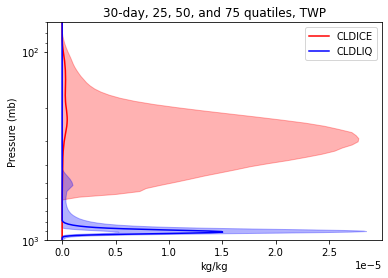

In [33]:
# monthly median profile with shaded regions as 25-75 percentiles
## h5 : U, V
## h7 : CLDIC, CLDLIQ
if h==("h5"):
    var0, var1 = "U", "V"
elif h=="h6":
    var0, var1 = "Q", "T"
elif h=="h7":
    var0, var1 = "CLDICE", "CLDLIQ"
elif h=="h8":
    var0, var1 = "CLOUD", "OMEGA"
elif h=="h9":
    var0, var1 = "EMIS", "TOT_ICLD_VISTAU"

if (h=="h5") or (h=="h7") or (h=="h9"):
    plt.fill_betweenx(ds.lev, ds[var0].quantile(0.25, dim=["time","lat","lon"]), ds[var0].quantile(0.75, dim=["time","lat","lon"]), color="r", alpha=0.3)
    plt.fill_betweenx(ds.lev, ds[var1].quantile(0.25, dim=["time","lat","lon"]), ds[var1].quantile(0.75, dim=["time","lat","lon"]), color="b", alpha=0.3)
    plt.plot(ds[var0].median(dim=["time","lat","lon"]), ds.lev, "r", label=var0)
    plt.plot(ds[var1].median(dim=["time","lat","lon"]), ds.lev, "b", label=var1)
    plt.ylim([1000,70])
    plt.yscale("log")
    plt.ylabel("Pressure (mb)")
    plt.xlabel(ds[var0].units)
    # plt.xscale("log")
    plt.legend()
    plt.title("30-day, 25, 50, and 75 quatiles, TWP")
    plt.show()
else:
    # h6 : Q, T
    # h8 : CLOUD, OMEGA
    fig, ax = plt.subplots(1,1, figsize=(4,5))
    ax.fill_betweenx(ds.lev, ds[var0].quantile(0.25, dim=["time","lat","lon"]), ds[var0].quantile(0.75, dim=["time","lat","lon"]), color="r", alpha=0.3)
    axt = ax.twiny()
    axt.fill_betweenx(ds.lev, ds[var1].quantile(0.25, dim=["time","lat","lon"]), ds[var1].quantile(0.75, dim=["time","lat","lon"]), color="b", alpha=0.3)
    ax.plot(ds[var0].median(dim=["time","lat","lon"]), ds.lev, "r", label=var0+" ("+ds[var0].units+")")
    axt.plot(ds[var1].median(dim=["time","lat","lon"]), ds.lev, "b", label=var1+" ("+ds[var1].units+")")
    ax.set_ylim([1000,5])
    ax.set_yscale("log")
    ax.set_ylabel("Pressure (mb)")
    ax.set_xlabel("")
    fig.legend(loc=5)
    ax.set_title("30-day, 25, 50, and 75 quatiles, TWP")
    plt.show()

In [4]:
ds

<xarray.Dataset>
Dimensions:          (ilev: 129, lat: 14, lev: 128, lon: 14, nbnd: 2, slat: 255, time: 240)
Coordinates:
  * ilev             (ilev) float64 2.255 2.905 3.555 ... 992.9 997.0 1e+03
  * lev              (lev) float64 2.58 3.23 3.88 4.597 ... 991.0 994.9 998.5
  * lat              (lat) float64 -4.588 -3.882 -3.176 ... 3.176 3.882 4.588
  * lon              (lon) float64 143.4 144.1 144.8 145.5 ... 151.2 151.9 152.6
  * time             (time) object 2020-01-30 00:00:00 ... 2020-02-28 21:00:00
Dimensions without coordinates: nbnd, slat
Data variables:
    w_stag           (time, slat) float64 7.589e-05 0.0002277 ... 7.589e-05
    lat_bnds         (time, lat, nbnd) float64 -4.941 -4.235 ... 4.235 4.941
    lon_bnds         (time, lon, nbnd) float64 143.1 143.8 143.8 ... 152.2 152.9
    gw               (time, lat) float64 0.01228 0.01229 ... 0.01229 0.01228
    area             (time, lat, lon) float64 0.0001507 0.0001507 ... 0.0001507
    EMIS             (time, lev, lat, lon) float32 0.0 0.0 ... 0.00021382977
    P0               (time) float64 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    TOT_ICLD_VISTAU  (time, lev, lat, lon) float32 0.0 0.0 ... 0.0006363529
    ch4vmr           (time) float64 1.808e-06 1.808e-06 ... 1.808e-06 1.808e-06
    co2vmr           (time) float64 0.000379 0.000379 ... 0.000379 0.000379
    date             (time) int32 20200130 20200130 ... 20200228 20200228
    date_written     (time) |S8 b'11/30/20' b'11/30/20' ... b'12/12/20'
    datesec          (time) int32 0 10800 21600 32400 ... 54000 64800 75600
    f11vmr           (time) float64 7.688e-10 7.688e-10 ... 7.688e-10 7.688e-10
    f12vmr           (time) float64 5.313e-10 5.313e-10 ... 5.313e-10 5.313e-10
    hyai             (time, ilev) float64 0.002255 0.002905 ... 9.235e-05 0.0
    hyam             (time, lev) float64 0.00258 0.00323 ... 0.0001556 4.618e-05
    hybi             (time, ilev) float64 0.0 0.0 0.0 0.0 ... 0.9927 0.9969 1.0
    hybm             (time, lev) float64 0.0 0.0 0.0 ... 0.9907 0.9948 0.9985
    mdt              (time) int32 75 75 75 75 75 75 75 ... 75 75 75 75 75 75 75
    n2ovmr           (time) float64 3.231e-07 3.231e-07 ... 3.231e-07 3.231e-07
    nbdate           (time) int32 20200120 20200120 ... 20200120 20200120
    nbsec            (time) int32 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    ndbase           (time) int32 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    ndcur            (time) int32 10 10 10 10 10 10 10 ... 39 39 39 39 39 39 39
    nsbase           (time) int32 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    nscur            (time) int32 0 10800 21600 32400 ... 54000 64800 75600
    nsteph           (time) int32 11520 11664 11808 11952 ... 45648 45792 45936
    sol_tsi          (time) float64 1.361e+03 1.361e+03 ... 1.361e+03 1.361e+03
    time_bnds        (time, nbnd) object 2020-01-29 21:00:00 ... 2020-02-28 2...
    time_written     (time) |S8 b'14:40:29' b'15:48:29' ... b'05:18:44'